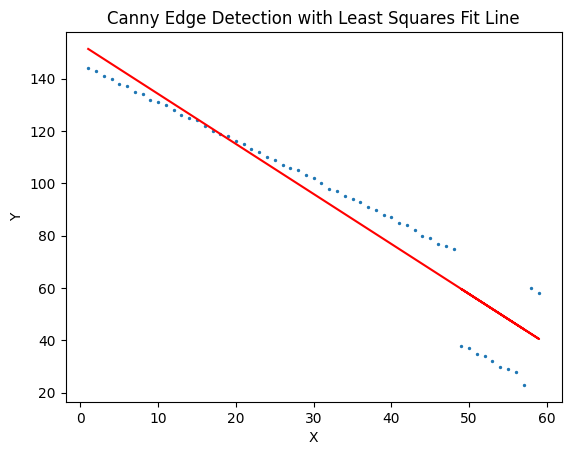

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('building_crop.jpg', cv.IMREAD_GRAYSCALE)

edges = cv.Canny(img, 350 , 390)
indices = np.where(edges != [0])
x_list = []
y_list = []
for i in range(len(indices[1])):
    if indices[1][i] not in x_list and indices[0][i] not in y_list:
        x_list.append(indices[1][i])
        y_list.append(indices[0][i])

x = np.array(x_list)
y = np.array(y_list)

A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

plt.scatter(x, y, s=2)
plt.plot(x, m*x + c, 'r')
plt.title('Canny Edge Detection with Least Squares Fit Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()